# RI-MOM

Expectation values with gauge-fixed quark external fields can be treated like any other correlation function.
They have open indices, such as open spin or color indices.

Diagrams are drawn without problems and traces are not closed.

In [13]:
import giancarlo as gc
gc.PlotStyle.style = 'dark_background'

Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
Qp = gc.Symbol('Q_+')
Qm = gc.Symbol('Q_-')

u, ubar = gc.SpinorField('u')
d, dbar = gc.SpinorField('d')
A = gc.PhotonField()

class Jgamma_iso:
    def __init__(self, x, mu):
        sa, sb = gc.default.var(), gc.default.var()
        self.sa = sa
        self.sb = sb
        self.x = x
        self.mu = mu
    
    def __call__(self):
        up = ubar(self.x, self.sa) * gc.DiracGamma(self.mu, self.sa, self.sb) * A(self.x, self.mu) * u(self.x, self.sb)
        down = dbar(self.x, self.sa) * gc.DiracGamma(self.mu, self.sa, self.sb) * A(self.x, self.mu) * d(self.x, self.sb)
        return Qu * up + Qd * down

Fields are defined at a given position, which is just a label. Since the Fourier Transform is a linear operator acting on the single field, we can re-interpret that label as a momentum without problem. 

The spinor propagator with open spin indices is as below.

In [17]:
qprop = u('p', 'sa') * ubar('q', 'sb')
qprop.wick()

( +S_u(p, q)(sa, sb) )

Now we introduce a double insertion of the electromagnetic current to evaluate the 1-loop corrections to the spinor propagator.

Since the two electromagnetic currents are summed over the entire space-time their (summed) indices can be exchanged and renamed. This is used to identify identical topologies and sum the corresponding contributions, as explained in other tutorials.

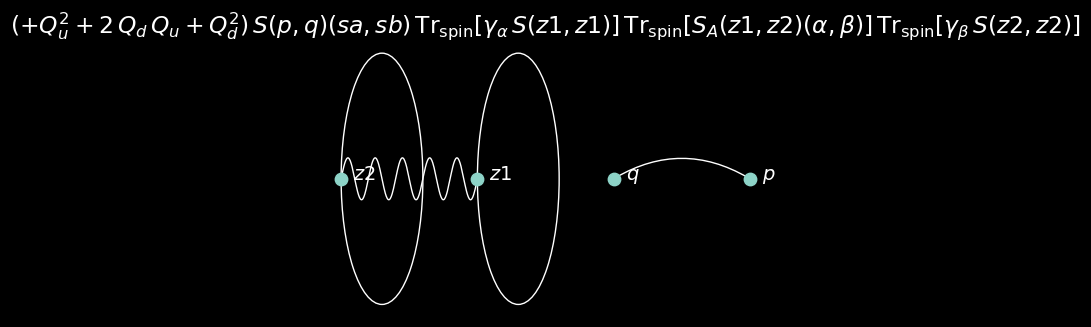

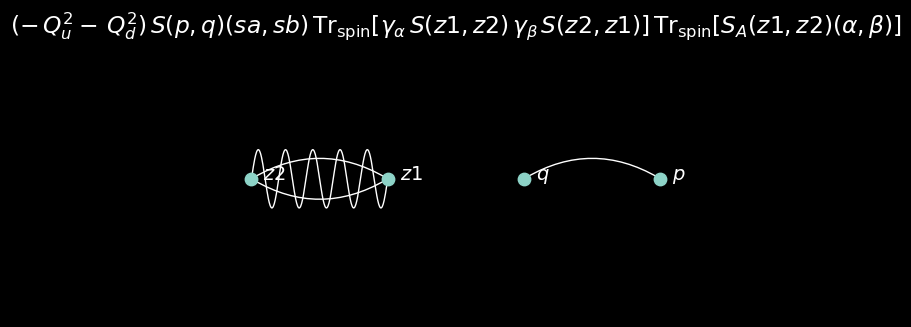

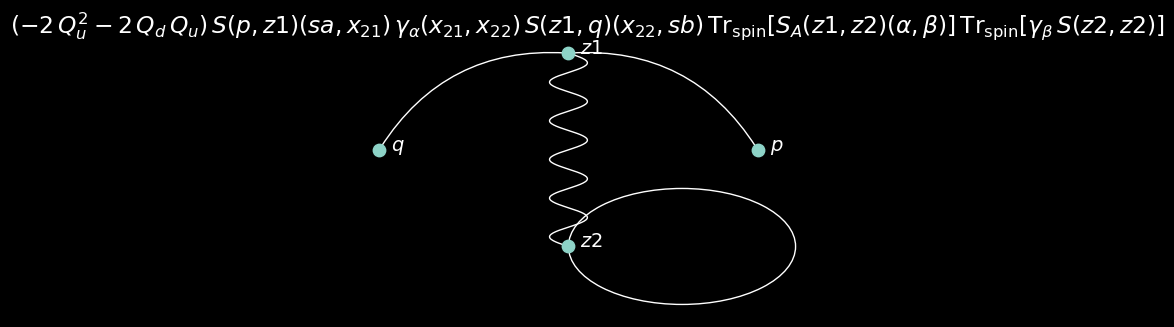

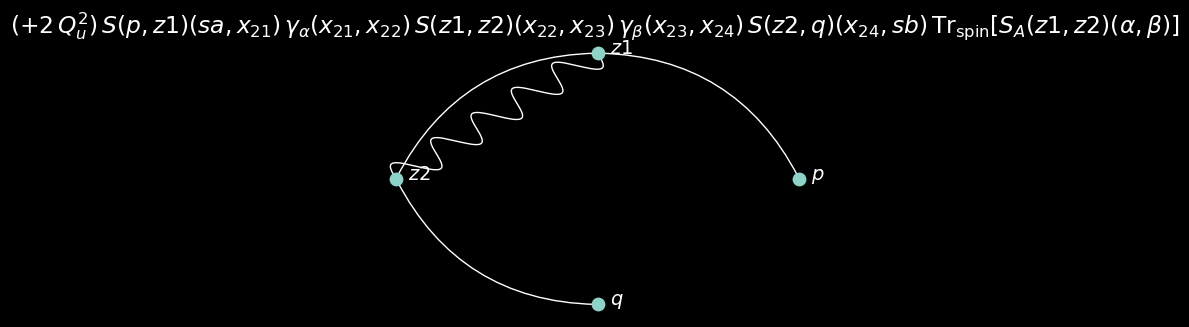

In [16]:
J1 = Jgamma_iso('z1', r'\alpha')
J2 = Jgamma_iso('z2', r'\beta')

syms = []
syms.append(gc.ExchangeSymmetry(pos=['z1', 'z2'], lorentz=[r'\alpha',r'\beta']))
syms.append(gc.ExchangeSymmetry(spin=[J1.sa, J2.sa]))
syms.append(gc.ExchangeSymmetry(spin=[J1.sb, J2.sb]))

qprop = u('p', 'sa') * ubar('q', 'sb') * J1() * J2()
qprop.wick().replace({'S_u': 'S', 'S_d': 'S'}).simplify(*syms).trace(['spin']).draw()